# XAI CODE DEMO


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo/your-notebook.ipynb)

Data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code

- Linear Regression: Checked for linearity between features and churn, normality of residuals, and homoscedasticity using visualizations such as scatter plots and residual plots. 
- Logistic Regression, Assessed the assumption of linearity between the log-odds of churn and the features. 
- Generalized Additive Model: Confirmed that the model could capture non-linear relationships through spline functions without requiring strict assumptions of linearity.

## Exploratory Data Analysis

In [1]:
# !pip install pygam
from pygam import LogisticGAM, s, f
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import numpy as np

file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

df.isnull().sum()
print(df['Churn'])

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object


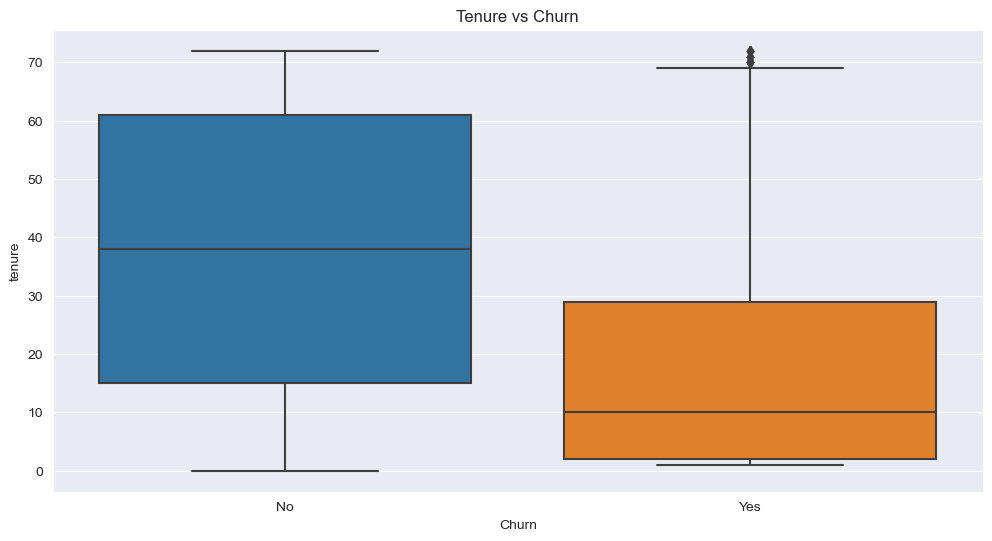

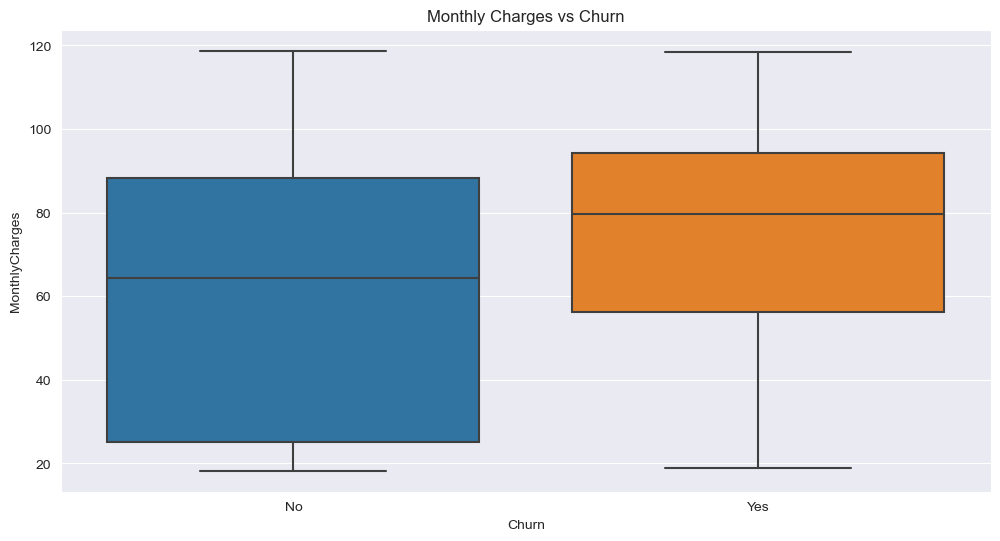

Tenure T-Test: TtestResult(statistic=-31.57955051135377, pvalue=7.99905796059022e-205, df=7041.0)
Monthly Charges T-Test: TtestResult(statistic=16.536738015936308, pvalue=2.7066456068884154e-60, df=7041.0)


In [2]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

t_test_tenure = stats.ttest_ind(df[df['Churn'] == 'Yes']['tenure'], df[df['Churn'] == 'No']['tenure'])
t_test_monthlycharges = stats.ttest_ind(df[df['Churn'] == 'Yes']['MonthlyCharges'], df[df['Churn'] == 'No']['MonthlyCharges'])

print(f'Tenure T-Test: {t_test_tenure}')
print(f'Monthly Charges T-Test: {t_test_monthlycharges}')

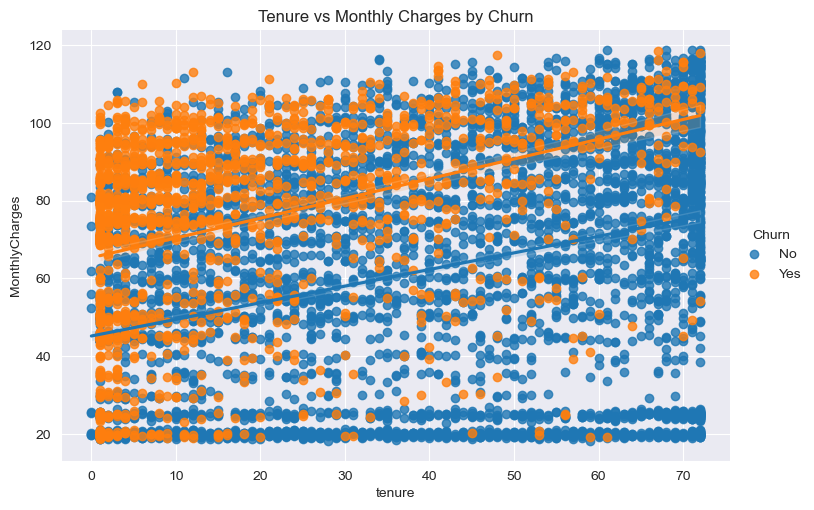

In [3]:
sns.lmplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, aspect=1.5)
plt.title('Tenure vs Monthly Charges by Churn')
plt.show()

## Linear Regression

In [4]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df.drop(columns=['customerID', 'Churn']), drop_first=True)

X = df_encoded
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

y_pred_binary = np.where(y_pred > 0.5, 1, 0)

linear_accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Linear Regression Accuracy: {linear_accuracy}')

Mean Squared Error: 0.14390377781638966
R-squared: 0.24792791885486143
Linear Regression Accuracy: 0.7995457126632595


In [6]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
coefficients['abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                                  Feature  Coefficient
10            InternetService_Fiber optic     0.204081
24                      Contract_One year    -0.103852
28         PaymentMethod_Electronic check     0.079084
25                      Contract_Two year    -0.061620
13                     OnlineSecurity_Yes    -0.056612
9                       MultipleLines_Yes     0.053653
23                    StreamingMovies_Yes     0.049628
21                        StreamingTV_Yes     0.047580
0                           SeniorCitizen     0.041879
26                   PaperlessBilling_Yes     0.039824
19                        TechSupport_Yes    -0.037982
16   DeviceProtection_No internet service    -0.027472
11                     InternetService_No    -0.027472
22    StreamingMovies_No internet service    -0.027472
18        TechSupport_No internet service    -0.027472
20        StreamingTV_No internet service    -0.027472
12     OnlineSecurity_No internet service    -0.027472
14       O

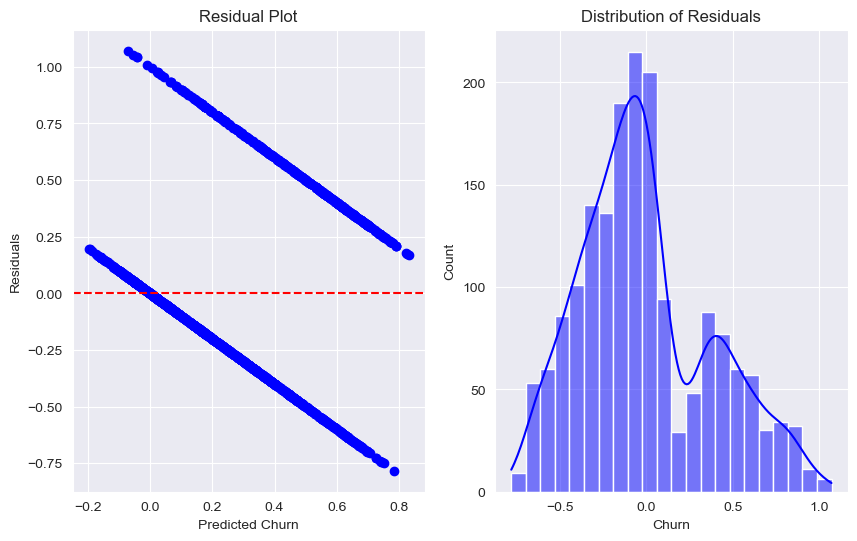

In [7]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Churn')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')

plt.show()


Linear regression assumes a linear relationship among features and target variables that may not hold in the context of customer churn because nonlinear interactions of features can influence churn, such as monetary amounts regarding tenure or contract type.

## Logistic Regression

In [8]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

logistic_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {logistic_accuracy}')

Accuracy: 0.8001135718341851


In [9]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients['abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                                  Feature  Coefficient
13                     OnlineSecurity_Yes    -0.508345
19                        TechSupport_Yes    -0.482216
10            InternetService_Fiber optic     0.467448
28         PaymentMethod_Electronic check     0.443690
25                      Contract_Two year    -0.352168
26                   PaperlessBilling_Yes     0.337479
0                           SeniorCitizen     0.288402
24                      Contract_One year    -0.274248
7                        PhoneService_Yes    -0.273038
15                       OnlineBackup_Yes    -0.259910
29             PaymentMethod_Mailed check    -0.237349
6                          Dependents_Yes    -0.233499
9                       MultipleLines_Yes     0.207422
27  PaymentMethod_Credit card (automatic)    -0.203197
17                   DeviceProtection_Yes    -0.185342
20        StreamingTV_No internet service    -0.154195
22    StreamingMovies_No internet service    -0.154195
16   Devic

Logistic Regression performed better than linear regression in terms of interpretability. Logistic regression is useful to understand the direction of the relationships. Still, it assumes linearity between log-odds of the outcome and the predictors.

## Generalized Additive Model

In [10]:
gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + f(4) + f(5) + f(6) + f(7) + f(8) + f(9))
gam.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = gam.predict_proba(X_test)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

GAM_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {GAM_accuracy}')

Accuracy: 0.78137421919364


GAM can model smooth curves for continuous features to provide fuller insight into precisely how the variables are affecting churn. This flexibility in the method means that generally, it performs better than logistic regression, particularly when the relationships in the dataset are complex. Added complexity does come at a slight cost, with it being more difficult to interpret than logistic regression.

## Model Comparison

In [11]:
print(f'Linear Regression Accuracy: {linear_accuracy}')
print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(f'GAM Accuracy: {GAM_accuracy}')

Linear Regression Accuracy: 0.7995457126632595
Logistic Regression Accuracy: 0.8001135718341851
GAM Accuracy: 0.78137421919364


Logistic regression provides a simpler but effective model whereas GAM offers the best balance of flexibility and performance. The choice between models reflects the trade-off between interpretability and performance needed for business decision-making.

Overall Suggestion: GAM